<a href="https://colab.research.google.com/github/nirmal428/Student-Performance-Prediction/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Model for Student Performance Prediction

install requirement libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import shap

Load dataset from Kaggle

download from: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
df = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:

df.rename(columns={'parental level of education': 'parental_level_of_education'}, inplace=True)
df.rename(columns={'test preparation course': 'test_preparation_course'}, inplace=True)
df.rename(columns={'math score': 'math_score'}, inplace=True)
df.rename(columns={'reading score': 'reading_score'}, inplace=True)
df.rename(columns={'writing score': 'writing_score'}, inplace=True)

In [ ]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data processing


In [ ]:
#check missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
# Create a target
df['pass_math'] = np.where(df['math_score'] >= 50, 1, 0)

In [ ]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


In [ ]:
# Encode
label_encoders = {}
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

In [ ]:
#using loop
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,1


In [ ]:
df.to_csv("data.csv", index=False)

In [ ]:
# Select features and target
X = df.drop(['pass_math'], axis=1)
y = df['pass_math']

In [ ]:

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
29,0,3,3,1,1,62,70,75
535,0,2,1,0,0,66,83,83
695,0,3,4,0,1,79,89,86
557,1,2,3,0,1,61,67,66
836,1,4,2,1,1,73,64,57
...,...,...,...,...,...,...,...,...
106,0,3,3,1,1,87,100,100
270,1,2,1,1,1,69,63,61
860,0,2,0,1,1,53,62,53
435,1,2,4,0,0,50,48,53


In [ ]:
y_train

,pass_math
29,1
535,1
695,1
557,1
836,1
...,...
106,1
270,1
860,1
435,1


In [ ]:
y_test

,pass_math
521,1
737,1
740,1
660,1
411,1
...,...
408,1
332,1
208,1
613,1


In [ ]:
X_test

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
521,0,2,0,1,1,91,86,84
737,0,1,4,0,0,53,66,73
740,1,3,1,1,1,80,73,72
660,1,2,4,0,1,74,77,73
411,1,4,4,1,0,84,83,78
...,...,...,...,...,...,...,...,...
408,0,3,2,0,0,52,57,56
332,1,4,0,1,0,62,56,53
208,0,1,4,0,1,74,81,76
613,0,2,0,1,1,65,77,74


Model Training

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Model Evaluation

In [ ]:
# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluation metrics
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       166

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



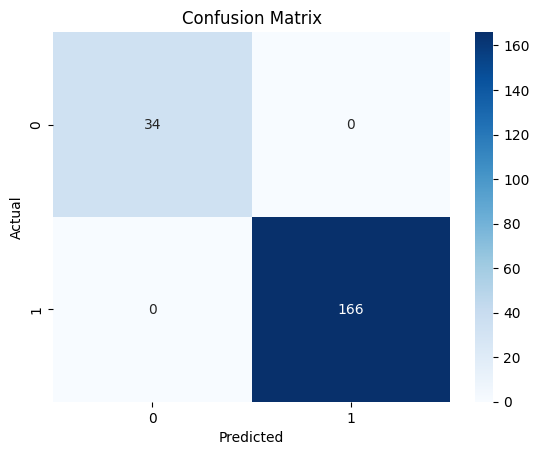

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

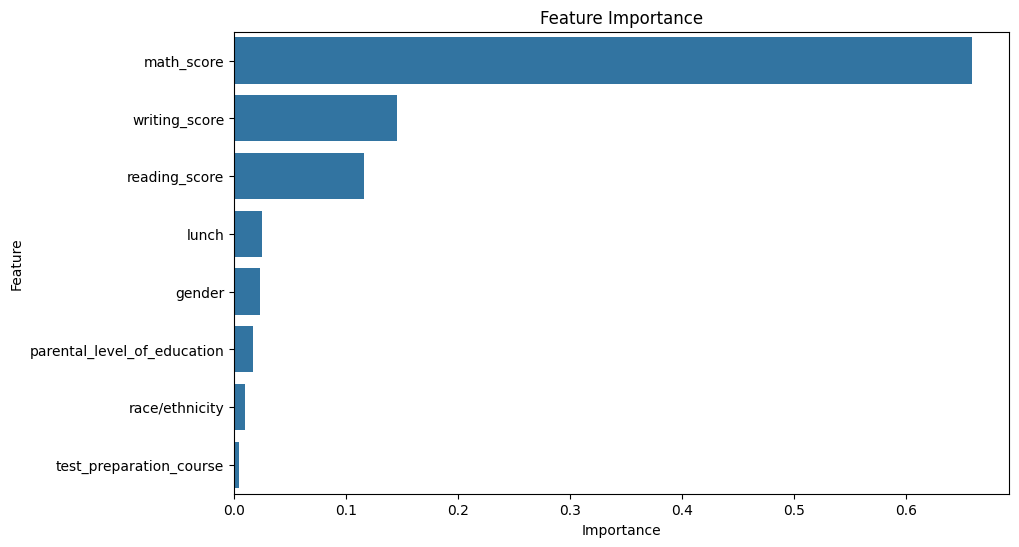

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

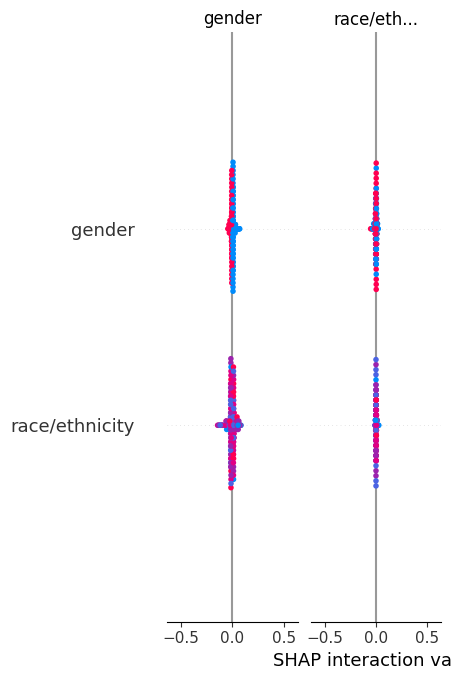

In [ ]:
# SHAP analysis
exp = shap.TreeExplainer(best_model)
shap_values = exp.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

prediction/ testing

In [ ]:
new_student = pd.DataFrame({
    'gender': ['female'], # Use string values
    'race/ethnicity': ['group C'], # Use string values
    'parental_level_of_education': ["bachelor's degree"], # Use string values
    'lunch': ['standard'], # Use string values
    'test_preparation_course': ['completed'], # Use string values
    'math_score': [80],
    'reading_score': [85],
    'writing_score': [90]
})

In [ ]:
# Preprocess new data
for col in categorical_cols:
    new_student[col] = label_encoders[col].transform(new_student[col])

In [ ]:
# Predict
prediction = best_model.predict(new_student)
print("\nPredicted Math Pass (1=Pass, 0=Fail):", prediction[0])


Predicted Math Pass (1=Pass, 0=Fail): 1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.9900

✅ Best model: LogisticRegression with accuracy 0.9900
✅ Saved best model as best_model.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv("/content/data.csv")

le = LabelEncoder()


# Load the trained model
best_model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Student Performance Pediction ", page_icon="👩‍🎓", layout="centered")

st.title("👩‍🎓 Student Performance Pediction App")
st.markdown("Prediction of student result PASS or FAIL")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Student Details")

# ✨ Replace these fields with your dataset's actual input columns
gender = st.sidebar.selectbox("gender", ['male', 'female'])
ethnicity= st.sidebar.selectbox("race/ethnicity", [ 'Group A', 'Group B', 'Group C'])
parental_level_of_education = st.sidebar.selectbox("parental level of education", [
     "high school", "associate's degree", "master's degree", "bachelor's degree", "Some college"
])
lunch = st.sidebar.selectbox("lunch", ['standard', 'free/reduced'])
test_preparation_course = st.sidebar.selectbox("Test Course", ['completed', 'none'])
math_score= st.sidebar.slider("Math score", 1, 100, 1)
reading_score = st.sidebar.slider("Reading score ", 1, 100, 1)
writing_score = st.sidebar.slider("Writing score", 1, 100, 1)




#encoding

data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['parental_level_of_education'] = le.fit_transform(data['parental_level_of_education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test_preparation_course'] = le.fit_transform(data['test_preparation_course'])






# Build input DataFrame (⚠️ must match preprocessing of your training data)

input_df = pd.DataFrame({
    'gender': [gender],
    'race/ethnicity': [ethnicity],
    'parental_level_of_education': [parental_level_of_education],
    'lunch': [lunch],
    'test_preparation_course': [test_preparation_course],
    'math_score': [math_score],
    'reading_score': [reading_score],
    'writing_score': [writing_score]

})

st.write("### 🔎 Input Data")
st.write(input_df)

# Rename columns to EXACT names used during training

# Predict button
if st.button("Predict student result "):
    pre=best_model.predict(input_df)
    st.success(f"✅ Prediction: {pre[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = best_model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Writing app.py


In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
!ngrok config add-authtoken 30BvBQwQmateGAeKw7CHCr4yKbu_5V3EASy9uWNFnu4hPfq3H


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py &>/dev/null&")

thread=threading.Thread(target=run_streamlit).start()

In [ ]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url=ngrok.connect(8501)
public_url

<NgrokTunnel: "https://e2683a2bec33.ngrok-free.app" -> "http://localhost:8501">